# Business problem description

Mobile companies after the launch of their new mobile products do not know how to estimate price of their products. Assuming will not work in the long term. To solve this problem my model will help mobile companies to set a price range on their new products by looking at the mobile features like ram, battery power, and dimensions of the phone.
The data were collected has the information of the various features of the mobile and its price range from low medium and high.
Some of the features mentioned in the dataset:

battery_power: Total energy a battery can store in one time measured in mAh

blue: whether mobile has bluetooth or not

clock_speed: speed at which microprocessor executes instructions

dual_sim: whether mobile has dual sim support or not

fc: Front Camera mega pixels

four_g: whether mobile has 4G or not

int_memory: Internal Memory in Gigabytes

m_dep: Mobile Depth in cm

mobile_wt: Weight of mobile phone

n_cores: Number of cores of processor

pc: Primary Camera mega pixels

px_height: Pixel Resolution Height

px_width: Pixel Resolution Width

ram: Random Access Memory in Mega Bytes

sc_h: Screen Height of mobile in cm

sc_w: Screen Width of mobile in cm

talk_time: longest time that a single battery charge will last when you are

three_g: whether mobile has 3G or not

touch_screen: whether mobile has touch screen or not

wifi: Has wifi or not

price_range: This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")

# Importing Data and handling missing values

I found two datasets named train and test with same number of columns and rows that is why the first step would be to combine them 

In [2]:
train = pd.read_csv('C:\\Users\\Shrita\\Downloads\\lab34\\train.csv')
test = pd.read_csv('C:\\Users\\Shrita\\Downloads\\lab34\\train.csv')

In [3]:
train.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [4]:
test.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [5]:
train.shape

(2000, 21)

In [6]:
test.shape

(2000, 21)

In [7]:
frames = [train, test]

In [8]:
df = pd.concat(frames)

Now we have a single dataframe with 4000 rows and 21 columns

Start by checking if there are any null values

In [9]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

No null values detected so we can move ahead woth next steps

# Feature Engineering 

There are two seperate columns named screen height and screen width
I will combine them together and call it area

In [10]:
df['sc_h'].head()

0     9
1    17
2    11
3    16
4     8
Name: sc_h, dtype: int64

In [11]:
df['sc_w'].head()

0    7
1    3
2    2
3    8
4    2
Name: sc_w, dtype: int64

In [12]:
df['area'] = df['sc_h'] * df['sc_w']

In [13]:
df['area'].head()

0     63
1     51
2     22
3    128
4     16
Name: area, dtype: int64

area of the screen = height of the screen * width of the screen

# Exploratory data analysis (EDA)

Eda is important to understand the relation of different features with each other

In [14]:
df['price_range_new'] = df['price_range'].map({0 : 'low price', 1 : 'medium price', 2 : 'high price',3: 'very high price'})

Converting labels into integers for visualization

Text(0.5, 1.0, 'Price range')

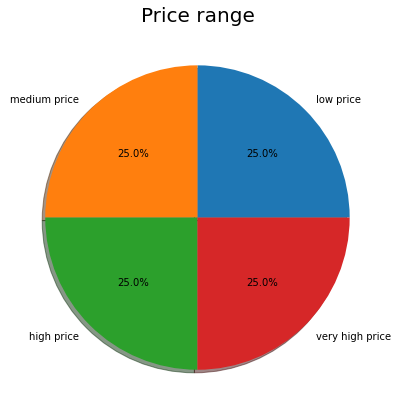

In [15]:
labels = ['low price','medium price','high price','very high price']
sizes = [df['price_range_new'].value_counts()[0],
         df['price_range_new'].value_counts()[1],
         df['price_range_new'].value_counts()[2],
         df['price_range_new'].value_counts()[3]         
        ]

fig1 = plt.figure(figsize=(20,7))
ax1=fig1.add_subplot(121)
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.set_title('Price range', fontsize = 20)


The data is well-balanced. The dataset has equal number of low, medium, high and very high price ranges for the mobile phone. 

Text(0.5, 1.0, 'does pixel height increase with increase in pixel width?')

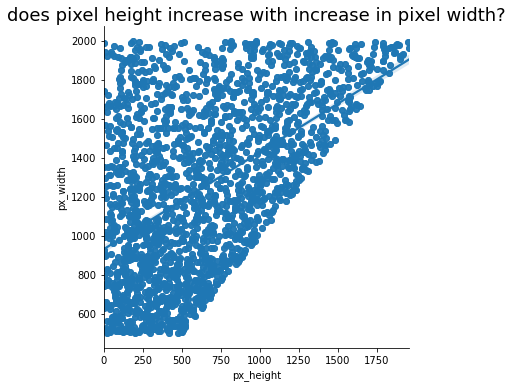

In [16]:
sns.lmplot(data=df,
           x="px_height",
           y="px_width"
         )
plt.title('does pixel height increase with increase in pixel width?', fontsize = 18)

This graph illustrates that the width of a phone is directly correlated to it's height. When height increases, width increases.

Text(0.5, 1.0, 'Does 4G reduce or increase ram')

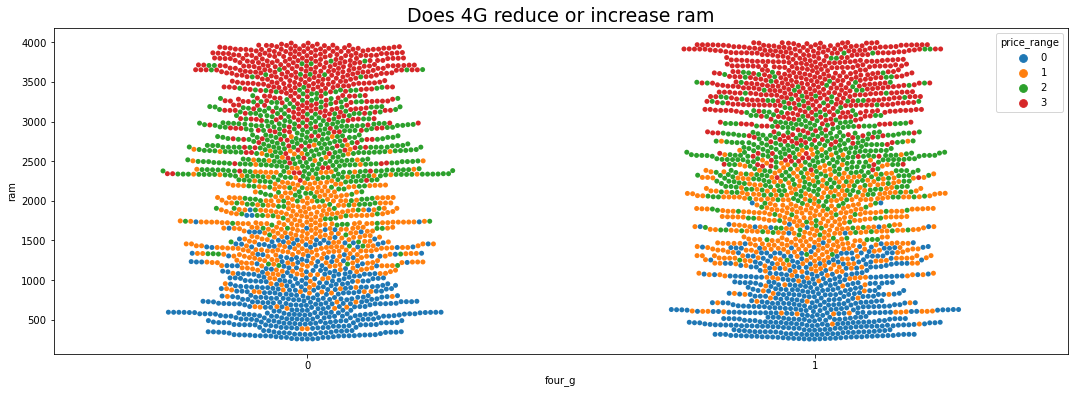

In [17]:
f= plt.figure(figsize=(40,6))

ax1=f.add_subplot(121)
b = sns.swarmplot(x="four_g", y="ram", hue="price_range",data=df)
b.axes.set_title('Does 4G reduce or increase ram', fontsize = 19)


Phones with 4g and high ram are frequent. Phones with higher price and no 4G along with medium ram are more popular.

Text(0.5, 1.0, 'Distribution of Battery power')

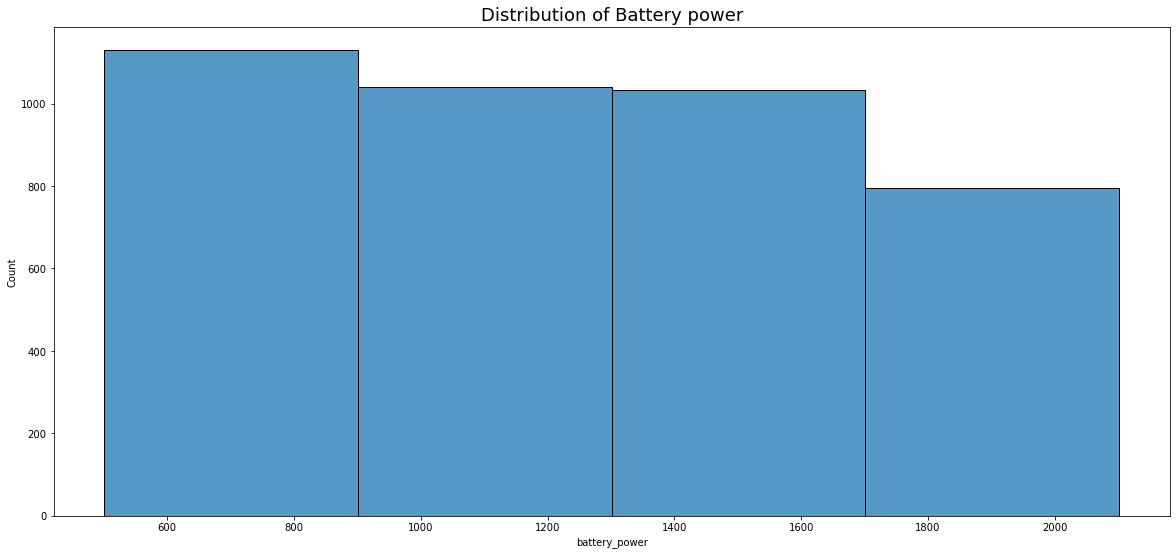

In [18]:
f= plt.figure(figsize=(20,9))
sns.histplot(data=df, x="battery_power", binwidth=400)
plt.title('Distribution of Battery power', fontsize = 18)

Most of the phones have battery power in the range 600-800. Phones having battery_power in the range is 1800-2000 is uncommon

Text(0.5, 1.0, 'Popular ram in MB')

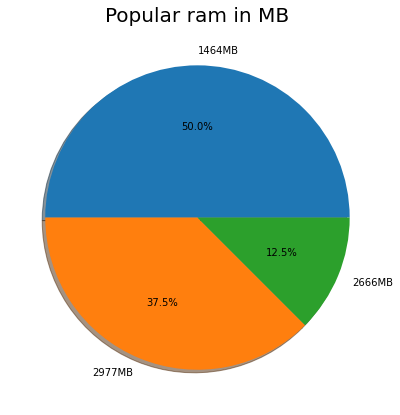

In [19]:
labels = ['1464MB','2977MB','2666MB']
sizes = [df['ram'].value_counts()[1464],
         df['ram'].value_counts()[2977],
         df['ram'].value_counts()[2666]
         
        ]

# print(sizes) # adds up to 1433, which is the total number of participants

fig1 = plt.figure(figsize=(20,7))
ax1=fig1.add_subplot(121)
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.set_title('Popular ram in MB', fontsize = 20)


The most popular ram in mobile phones is 1464MB followed by 2977MB and 2666MB respectively

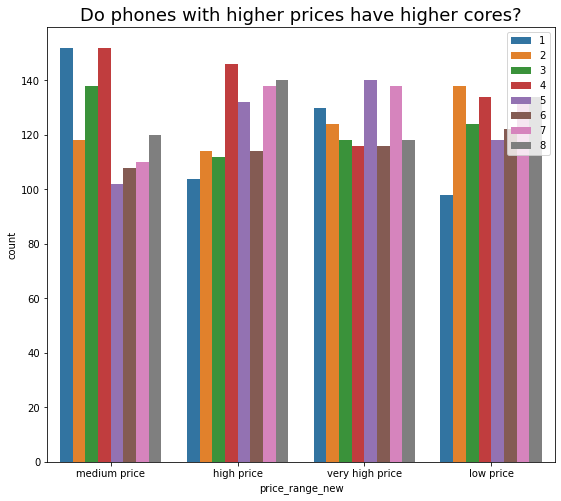

In [20]:
fig1 = plt.figure(figsize=(20,8))
ax1=fig1.add_subplot(121)
sns.countplot(data=df, hue='n_cores', x='price_range_new')
plt.title('Do phones with higher prices have higher cores?', fontsize = 18)
ax1.legend(loc=1)

In the medium price category, the number of cores in a phone that are popular is 1-4

In the high price category, the number of cores in a phone that are popular is 4,7,8

In the low price category, the number of cores in a phone that are popular are 2and 4 which is low

In conclusion, phones with higher prices have higher cores

Text(0.5, 1.0, 'Distribution of fc')

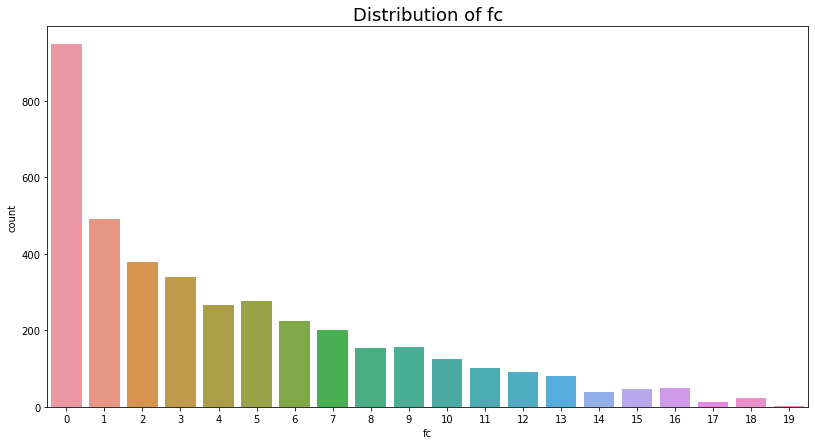

In [21]:
f= plt.figure(figsize=(30,7))

ax1=f.add_subplot(121)
sns.countplot(x ='fc', data = df)
plt.title('Distribution of fc', fontsize = 18)

There are many phones with no front camers hence we can see that the have 0 mega pixels.

5 mega pixels front camera are slightly higher

Text(0.5, 1.0, 'Distribution of pc')

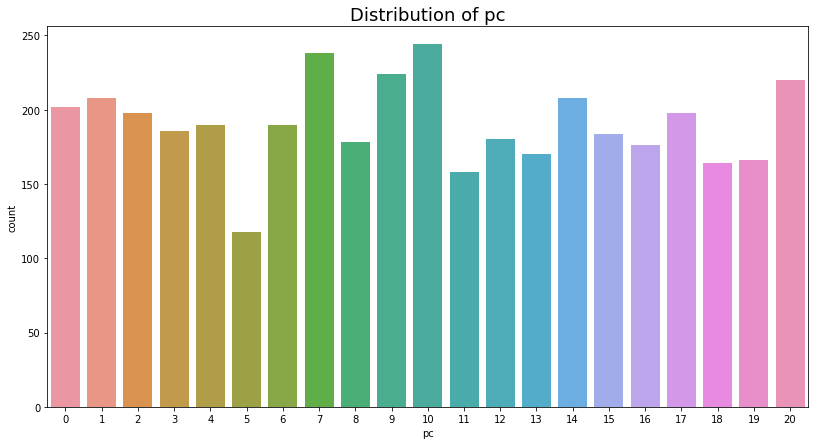

In [22]:
f= plt.figure(figsize=(30,7))

ax1=f.add_subplot(121)
sns.countplot(x ='pc', data = df)
plt.title('Distribution of pc', fontsize = 18)

Most of the mobile phones have primary camera with 7, 10 and 20 mega pixels.

# Removing unnecessary columns

In [23]:
df = df.drop(['price_range_new','sc_h','sc_w'], axis=1)


# Feature Selection using ExtraTreesClassifier

In [24]:
X = df.drop(['price_range'], axis=1)
y = df['price_range']

[0.06331952 0.01976528 0.03431907 0.01947234 0.03258448 0.01739155
 0.03666653 0.03481333 0.03736614 0.03340453 0.03535475 0.04917614
 0.05055826 0.41064904 0.03577169 0.01428558 0.01857536 0.02072479
 0.03580161]


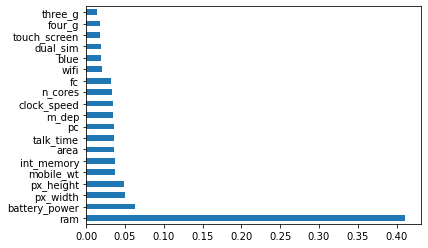

In [25]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(23).plot(kind='barh')
plt.show()

According to the ExtraTreesClassifier, the top 5 features that are best correlated to the target variables are

'ram'  :  0.39380965 
    
'battery_power' :  0.06053912 
    
'px_width' : 0.04828258
    
'px_height'  :  0.0477025 
    
'mobile_wt'  :  0.03700909  

All of the five features will give a better accuracy than adding all the features

# Splitting X and y sets

In [26]:
X = df[['ram','battery_power','px_width','px_height','mobile_wt']]
y = df['price_range']

# Splitting train, tets and validation set

Splitting the data into train and test data ony has some risks involved. the data that goes into train and test sets are random which leads to a possibility that all the "good" data can be added to train and "bad" data can be added to the test set

Imagine the model getting trained ony on the good data(train) and then getting the test data which has totally different data points.

I mentioned the caveats in the train/test split method. In order to avoid this, we can perform something called cross validation.

It’s very similar to train/test split, but it’s applied to more subsets. Meaning, we split our data into k subsets, and train on k-1 one of those subset. What we do is to hold the last subset for test. We’re able to do it for each of the subsets.


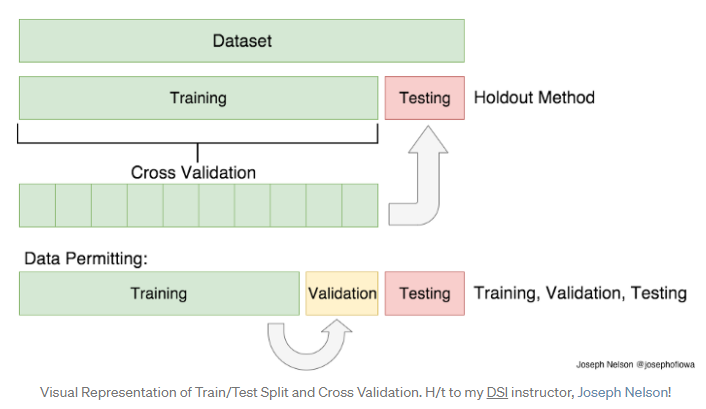

I have split the main data into three sets i.e. train, test and validatin sets. My idea is to finalize the model using different  models and its parameters. 

After I know that the accuracy can not be increased any further I will test it on the validation set.

This helps to check the performance of the model on unseen data.

- 60% (training)
- 20% (validation)
- 20% (testing)

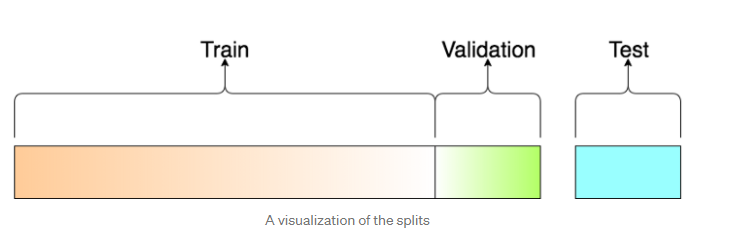

In [27]:
from sklearn.model_selection import GridSearchCV, train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

In [28]:
X_train.shape

(2400, 5)

In [29]:
X_test.shape

(1600, 5)

In [30]:
y_train.shape

(2400,)

In [31]:
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = 0)

In [32]:
X_train.shape

(2400, 5)

In [33]:
X_val.shape

(800, 5)

In [34]:
X_test.shape

(800, 5)

# Feature Scaling using  StandardScaler

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_val = sc.transform(X_val)


# ML Classifier - KNN

In [36]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_val)

# Accuracy of the model - KNN

In [37]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, y_pred)
print(cm)
from sklearn.metrics import accuracy_score
accuracy_score(y_val, y_pred)

[[194  20   0   0]
 [  9 160  15   0]
 [  0  21 159  22]
 [  0   0  29 171]]


0.855

# ML Classifier - SVM

In [38]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_val)


# Accuracy of the model - SVM

In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, y_pred)
print(cm)
from sklearn.metrics import accuracy_score
accuracy_score(y_val, y_pred)

[[210   4   0   0]
 [  1 181   2   0]
 [  0   6 190   6]
 [  0   0   1 199]]


0.975

# ML Classifier - DecisionTreeClasifier

In [40]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_val)


# Accuracy of the model - DecisionTreeClasifier

In [41]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, y_pred)
print(cm)
from sklearn.metrics import accuracy_score
accuracy_score(y_val, y_pred)

[[204  10   0   0]
 [  0 174  10   0]
 [  0   8 179  15]
 [  0   0   8 192]]


0.93625

# ML Classifier - RandomForestClasifier

In [42]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_val)


# Accuracy of the model - RandomForestClasifier

In [43]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, y_pred)
print(cm)
from sklearn.metrics import accuracy_score
accuracy_score(y_val, y_pred)

[[209   5   0   0]
 [  1 180   3   0]
 [  0   9 184   9]
 [  0   0   5 195]]


0.96

Out of all the algorithms tests, SVM has performed better. But because of the higher accuracy there is a chance that the model might be overfitting.

SVM is sensitive to noisy and the amount of training data, chances of over fitting is high.

We will first find which of the parameters that gives us the best accuracy using GridSearchCV

# Hyperparameter tuning using GridSearchCV for SVM model 

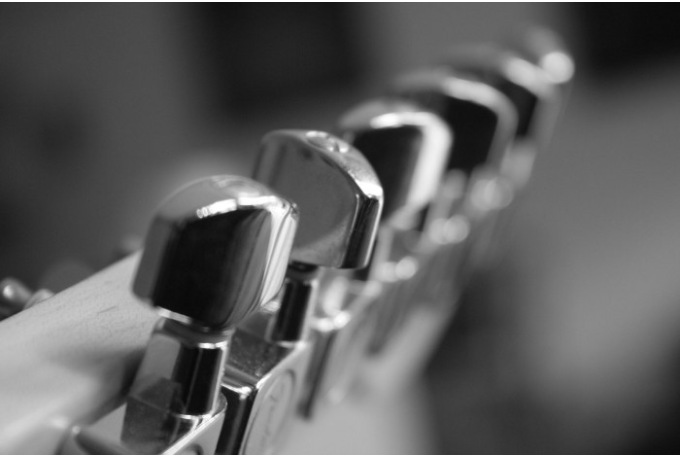

I have added the param cv in GridSearchCV which Determines the cross-validation splitting strategy.

In [44]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.001,0.01,1,0.1,0.25,0.5,2,0.75],'gamma':["auto",0.01,0.001,0.0001,1], 'decision_function_shape':["ovo","ovr"],'kernel':['linear','rbf']}
grid = GridSearchCV(SVC(),param_grid,refit = True, verbose=2, cv = 5)
grid.fit(X_train,y_train)
print(grid.best_params_)

Fitting 5 folds for each of 160 candidates, totalling 800 fits
[CV] C=0.001, decision_function_shape=ovo, gamma=auto, kernel=linear .
[CV]  C=0.001, decision_function_shape=ovo, gamma=auto, kernel=linear, total=   0.1s
[CV] C=0.001, decision_function_shape=ovo, gamma=auto, kernel=linear .
[CV]  C=0.001, decision_function_shape=ovo, gamma=auto, kernel=linear, total=   0.1s
[CV] C=0.001, decision_function_shape=ovo, gamma=auto, kernel=linear .


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  C=0.001, decision_function_shape=ovo, gamma=auto, kernel=linear, total=   0.1s
[CV] C=0.001, decision_function_shape=ovo, gamma=auto, kernel=linear .
[CV]  C=0.001, decision_function_shape=ovo, gamma=auto, kernel=linear, total=   0.1s
[CV] C=0.001, decision_function_shape=ovo, gamma=auto, kernel=linear .
[CV]  C=0.001, decision_function_shape=ovo, gamma=auto, kernel=linear, total=   0.1s
[CV] C=0.001, decision_function_shape=ovo, gamma=auto, kernel=rbf ....
[CV]  C=0.001, decision_function_shape=ovo, gamma=auto, kernel=rbf, total=   0.2s
[CV] C=0.001, decision_function_shape=ovo, gamma=auto, kernel=rbf ....
[CV]  C=0.001, decision_function_shape=ovo, gamma=auto, kernel=rbf, total=   0.2s
[CV] C=0.001, decision_function_shape=ovo, gamma=auto, kernel=rbf ....
[CV]  C=0.001, decision_function_shape=ovo, gamma=auto, kernel=rbf, total=   0.2s
[CV] C=0.001, decision_function_shape=ovo, gamma=auto, kernel=rbf ....
[CV]  C=0.001, decision_function_shape=ovo, gamma=auto, kernel=rbf, total

[CV]  C=0.001, decision_function_shape=ovr, gamma=auto, kernel=rbf, total=   0.2s
[CV] C=0.001, decision_function_shape=ovr, gamma=auto, kernel=rbf ....
[CV]  C=0.001, decision_function_shape=ovr, gamma=auto, kernel=rbf, total=   0.2s
[CV] C=0.001, decision_function_shape=ovr, gamma=auto, kernel=rbf ....
[CV]  C=0.001, decision_function_shape=ovr, gamma=auto, kernel=rbf, total=   0.2s
[CV] C=0.001, decision_function_shape=ovr, gamma=auto, kernel=rbf ....
[CV]  C=0.001, decision_function_shape=ovr, gamma=auto, kernel=rbf, total=   0.2s
[CV] C=0.001, decision_function_shape=ovr, gamma=auto, kernel=rbf ....
[CV]  C=0.001, decision_function_shape=ovr, gamma=auto, kernel=rbf, total=   0.2s
[CV] C=0.001, decision_function_shape=ovr, gamma=0.01, kernel=linear .
[CV]  C=0.001, decision_function_shape=ovr, gamma=0.01, kernel=linear, total=   0.1s
[CV] C=0.001, decision_function_shape=ovr, gamma=0.01, kernel=linear .
[CV]  C=0.001, decision_function_shape=ovr, gamma=0.01, kernel=linear, total=  

[CV]  C=0.01, decision_function_shape=ovo, gamma=auto, kernel=rbf, total=   0.2s
[CV] C=0.01, decision_function_shape=ovo, gamma=0.01, kernel=linear ..
[CV]  C=0.01, decision_function_shape=ovo, gamma=0.01, kernel=linear, total=   0.0s
[CV] C=0.01, decision_function_shape=ovo, gamma=0.01, kernel=linear ..
[CV]  C=0.01, decision_function_shape=ovo, gamma=0.01, kernel=linear, total=   0.0s
[CV] C=0.01, decision_function_shape=ovo, gamma=0.01, kernel=linear ..
[CV]  C=0.01, decision_function_shape=ovo, gamma=0.01, kernel=linear, total=   0.0s
[CV] C=0.01, decision_function_shape=ovo, gamma=0.01, kernel=linear ..
[CV]  C=0.01, decision_function_shape=ovo, gamma=0.01, kernel=linear, total=   0.0s
[CV] C=0.01, decision_function_shape=ovo, gamma=0.01, kernel=linear ..
[CV]  C=0.01, decision_function_shape=ovo, gamma=0.01, kernel=linear, total=   0.1s
[CV] C=0.01, decision_function_shape=ovo, gamma=0.01, kernel=rbf .....
[CV]  C=0.01, decision_function_shape=ovo, gamma=0.01, kernel=rbf, total=

[CV]  C=0.01, decision_function_shape=ovr, gamma=0.01, kernel=rbf, total=   0.2s
[CV] C=0.01, decision_function_shape=ovr, gamma=0.01, kernel=rbf .....
[CV]  C=0.01, decision_function_shape=ovr, gamma=0.01, kernel=rbf, total=   0.2s
[CV] C=0.01, decision_function_shape=ovr, gamma=0.01, kernel=rbf .....
[CV]  C=0.01, decision_function_shape=ovr, gamma=0.01, kernel=rbf, total=   0.2s
[CV] C=0.01, decision_function_shape=ovr, gamma=0.01, kernel=rbf .....
[CV]  C=0.01, decision_function_shape=ovr, gamma=0.01, kernel=rbf, total=   0.2s
[CV] C=0.01, decision_function_shape=ovr, gamma=0.01, kernel=rbf .....
[CV]  C=0.01, decision_function_shape=ovr, gamma=0.01, kernel=rbf, total=   0.2s
[CV] C=0.01, decision_function_shape=ovr, gamma=0.001, kernel=linear .
[CV]  C=0.01, decision_function_shape=ovr, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=0.01, decision_function_shape=ovr, gamma=0.001, kernel=linear .
[CV]  C=0.01, decision_function_shape=ovr, gamma=0.001, kernel=linear, total=   0.0s

[CV]  C=1, decision_function_shape=ovo, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=1, decision_function_shape=ovo, gamma=0.001, kernel=linear ....
[CV]  C=1, decision_function_shape=ovo, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=1, decision_function_shape=ovo, gamma=0.001, kernel=rbf .......
[CV]  C=1, decision_function_shape=ovo, gamma=0.001, kernel=rbf, total=   0.2s
[CV] C=1, decision_function_shape=ovo, gamma=0.001, kernel=rbf .......
[CV]  C=1, decision_function_shape=ovo, gamma=0.001, kernel=rbf, total=   0.2s
[CV] C=1, decision_function_shape=ovo, gamma=0.001, kernel=rbf .......
[CV]  C=1, decision_function_shape=ovo, gamma=0.001, kernel=rbf, total=   0.2s
[CV] C=1, decision_function_shape=ovo, gamma=0.001, kernel=rbf .......
[CV]  C=1, decision_function_shape=ovo, gamma=0.001, kernel=rbf, total=   0.2s
[CV] C=1, decision_function_shape=ovo, gamma=0.001, kernel=rbf .......
[CV]  C=1, decision_function_shape=ovo, gamma=0.001, kernel=rbf, total=   0.2s
[CV] C=1, decis

[CV]  C=1, decision_function_shape=ovr, gamma=0.001, kernel=rbf, total=   0.2s
[CV] C=1, decision_function_shape=ovr, gamma=0.001, kernel=rbf .......
[CV]  C=1, decision_function_shape=ovr, gamma=0.001, kernel=rbf, total=   0.2s
[CV] C=1, decision_function_shape=ovr, gamma=0.0001, kernel=linear ...
[CV]  C=1, decision_function_shape=ovr, gamma=0.0001, kernel=linear, total=   0.0s
[CV] C=1, decision_function_shape=ovr, gamma=0.0001, kernel=linear ...
[CV]  C=1, decision_function_shape=ovr, gamma=0.0001, kernel=linear, total=   0.0s
[CV] C=1, decision_function_shape=ovr, gamma=0.0001, kernel=linear ...
[CV]  C=1, decision_function_shape=ovr, gamma=0.0001, kernel=linear, total=   0.0s
[CV] C=1, decision_function_shape=ovr, gamma=0.0001, kernel=linear ...
[CV]  C=1, decision_function_shape=ovr, gamma=0.0001, kernel=linear, total=   0.0s
[CV] C=1, decision_function_shape=ovr, gamma=0.0001, kernel=linear ...
[CV]  C=1, decision_function_shape=ovr, gamma=0.0001, kernel=linear, total=   0.0s
[

[CV]  C=0.1, decision_function_shape=ovo, gamma=0.0001, kernel=rbf, total=   0.2s
[CV] C=0.1, decision_function_shape=ovo, gamma=0.0001, kernel=rbf ....
[CV]  C=0.1, decision_function_shape=ovo, gamma=0.0001, kernel=rbf, total=   0.2s
[CV] C=0.1, decision_function_shape=ovo, gamma=0.0001, kernel=rbf ....
[CV]  C=0.1, decision_function_shape=ovo, gamma=0.0001, kernel=rbf, total=   0.2s
[CV] C=0.1, decision_function_shape=ovo, gamma=0.0001, kernel=rbf ....
[CV]  C=0.1, decision_function_shape=ovo, gamma=0.0001, kernel=rbf, total=   0.2s
[CV] C=0.1, decision_function_shape=ovo, gamma=0.0001, kernel=rbf ....
[CV]  C=0.1, decision_function_shape=ovo, gamma=0.0001, kernel=rbf, total=   0.2s
[CV] C=0.1, decision_function_shape=ovo, gamma=1, kernel=linear ......
[CV]  C=0.1, decision_function_shape=ovo, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, decision_function_shape=ovo, gamma=1, kernel=linear ......
[CV]  C=0.1, decision_function_shape=ovo, gamma=1, kernel=linear, total=   0.0s
[CV]

[CV]  C=0.1, decision_function_shape=ovr, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, decision_function_shape=ovr, gamma=1, kernel=linear ......
[CV]  C=0.1, decision_function_shape=ovr, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, decision_function_shape=ovr, gamma=1, kernel=linear ......
[CV]  C=0.1, decision_function_shape=ovr, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, decision_function_shape=ovr, gamma=1, kernel=linear ......
[CV]  C=0.1, decision_function_shape=ovr, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, decision_function_shape=ovr, gamma=1, kernel=linear ......
[CV]  C=0.1, decision_function_shape=ovr, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, decision_function_shape=ovr, gamma=1, kernel=rbf .........
[CV]  C=0.1, decision_function_shape=ovr, gamma=1, kernel=rbf, total=   0.2s
[CV] C=0.1, decision_function_shape=ovr, gamma=1, kernel=rbf .........
[CV]  C=0.1, decision_function_shape=ovr, gamma=1, kernel=rbf, total=   0.2s
[CV] C=0.1, decision

[CV]  C=0.25, decision_function_shape=ovo, gamma=1, kernel=rbf, total=   0.1s
[CV] C=0.25, decision_function_shape=ovo, gamma=1, kernel=rbf ........
[CV]  C=0.25, decision_function_shape=ovo, gamma=1, kernel=rbf, total=   0.1s
[CV] C=0.25, decision_function_shape=ovo, gamma=1, kernel=rbf ........
[CV]  C=0.25, decision_function_shape=ovo, gamma=1, kernel=rbf, total=   0.1s
[CV] C=0.25, decision_function_shape=ovo, gamma=1, kernel=rbf ........
[CV]  C=0.25, decision_function_shape=ovo, gamma=1, kernel=rbf, total=   0.1s
[CV] C=0.25, decision_function_shape=ovo, gamma=1, kernel=rbf ........
[CV]  C=0.25, decision_function_shape=ovo, gamma=1, kernel=rbf, total=   0.1s
[CV] C=0.25, decision_function_shape=ovr, gamma=auto, kernel=linear ..
[CV]  C=0.25, decision_function_shape=ovr, gamma=auto, kernel=linear, total=   0.0s
[CV] C=0.25, decision_function_shape=ovr, gamma=auto, kernel=linear ..
[CV]  C=0.25, decision_function_shape=ovr, gamma=auto, kernel=linear, total=   0.0s
[CV] C=0.25, dec

[CV]  C=0.25, decision_function_shape=ovr, gamma=1, kernel=rbf, total=   0.1s
[CV] C=0.5, decision_function_shape=ovo, gamma=auto, kernel=linear ...
[CV]  C=0.5, decision_function_shape=ovo, gamma=auto, kernel=linear, total=   0.0s
[CV] C=0.5, decision_function_shape=ovo, gamma=auto, kernel=linear ...
[CV]  C=0.5, decision_function_shape=ovo, gamma=auto, kernel=linear, total=   0.0s
[CV] C=0.5, decision_function_shape=ovo, gamma=auto, kernel=linear ...
[CV]  C=0.5, decision_function_shape=ovo, gamma=auto, kernel=linear, total=   0.0s
[CV] C=0.5, decision_function_shape=ovo, gamma=auto, kernel=linear ...
[CV]  C=0.5, decision_function_shape=ovo, gamma=auto, kernel=linear, total=   0.0s
[CV] C=0.5, decision_function_shape=ovo, gamma=auto, kernel=linear ...
[CV]  C=0.5, decision_function_shape=ovo, gamma=auto, kernel=linear, total=   0.0s
[CV] C=0.5, decision_function_shape=ovo, gamma=auto, kernel=rbf ......
[CV]  C=0.5, decision_function_shape=ovo, gamma=auto, kernel=rbf, total=   0.1s
[

[CV]  C=0.5, decision_function_shape=ovr, gamma=auto, kernel=rbf, total=   0.1s
[CV] C=0.5, decision_function_shape=ovr, gamma=auto, kernel=rbf ......
[CV]  C=0.5, decision_function_shape=ovr, gamma=auto, kernel=rbf, total=   0.1s
[CV] C=0.5, decision_function_shape=ovr, gamma=auto, kernel=rbf ......
[CV]  C=0.5, decision_function_shape=ovr, gamma=auto, kernel=rbf, total=   0.1s
[CV] C=0.5, decision_function_shape=ovr, gamma=auto, kernel=rbf ......
[CV]  C=0.5, decision_function_shape=ovr, gamma=auto, kernel=rbf, total=   0.1s
[CV] C=0.5, decision_function_shape=ovr, gamma=auto, kernel=rbf ......
[CV]  C=0.5, decision_function_shape=ovr, gamma=auto, kernel=rbf, total=   0.1s
[CV] C=0.5, decision_function_shape=ovr, gamma=0.01, kernel=linear ...
[CV]  C=0.5, decision_function_shape=ovr, gamma=0.01, kernel=linear, total=   0.0s
[CV] C=0.5, decision_function_shape=ovr, gamma=0.01, kernel=linear ...
[CV]  C=0.5, decision_function_shape=ovr, gamma=0.01, kernel=linear, total=   0.0s
[CV] C=0

[CV]  C=2, decision_function_shape=ovo, gamma=auto, kernel=rbf, total=   0.0s
[CV] C=2, decision_function_shape=ovo, gamma=0.01, kernel=linear .....
[CV]  C=2, decision_function_shape=ovo, gamma=0.01, kernel=linear, total=   0.0s
[CV] C=2, decision_function_shape=ovo, gamma=0.01, kernel=linear .....
[CV]  C=2, decision_function_shape=ovo, gamma=0.01, kernel=linear, total=   0.0s
[CV] C=2, decision_function_shape=ovo, gamma=0.01, kernel=linear .....
[CV]  C=2, decision_function_shape=ovo, gamma=0.01, kernel=linear, total=   0.0s
[CV] C=2, decision_function_shape=ovo, gamma=0.01, kernel=linear .....
[CV]  C=2, decision_function_shape=ovo, gamma=0.01, kernel=linear, total=   0.0s
[CV] C=2, decision_function_shape=ovo, gamma=0.01, kernel=linear .....
[CV]  C=2, decision_function_shape=ovo, gamma=0.01, kernel=linear, total=   0.0s
[CV] C=2, decision_function_shape=ovo, gamma=0.01, kernel=rbf ........
[CV]  C=2, decision_function_shape=ovo, gamma=0.01, kernel=rbf, total=   0.1s
[CV] C=2, dec

[CV]  C=2, decision_function_shape=ovr, gamma=0.01, kernel=rbf, total=   0.1s
[CV] C=2, decision_function_shape=ovr, gamma=0.01, kernel=rbf ........
[CV]  C=2, decision_function_shape=ovr, gamma=0.01, kernel=rbf, total=   0.1s
[CV] C=2, decision_function_shape=ovr, gamma=0.01, kernel=rbf ........
[CV]  C=2, decision_function_shape=ovr, gamma=0.01, kernel=rbf, total=   0.1s
[CV] C=2, decision_function_shape=ovr, gamma=0.01, kernel=rbf ........
[CV]  C=2, decision_function_shape=ovr, gamma=0.01, kernel=rbf, total=   0.1s
[CV] C=2, decision_function_shape=ovr, gamma=0.01, kernel=rbf ........
[CV]  C=2, decision_function_shape=ovr, gamma=0.01, kernel=rbf, total=   0.1s
[CV] C=2, decision_function_shape=ovr, gamma=0.001, kernel=linear ....
[CV]  C=2, decision_function_shape=ovr, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=2, decision_function_shape=ovr, gamma=0.001, kernel=linear ....
[CV]  C=2, decision_function_shape=ovr, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=2, decision_f

[CV]  C=0.75, decision_function_shape=ovo, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=0.75, decision_function_shape=ovo, gamma=0.001, kernel=linear .
[CV]  C=0.75, decision_function_shape=ovo, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=0.75, decision_function_shape=ovo, gamma=0.001, kernel=linear .
[CV]  C=0.75, decision_function_shape=ovo, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=0.75, decision_function_shape=ovo, gamma=0.001, kernel=linear .
[CV]  C=0.75, decision_function_shape=ovo, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=0.75, decision_function_shape=ovo, gamma=0.001, kernel=linear .
[CV]  C=0.75, decision_function_shape=ovo, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=0.75, decision_function_shape=ovo, gamma=0.001, kernel=rbf ....
[CV]  C=0.75, decision_function_shape=ovo, gamma=0.001, kernel=rbf, total=   0.2s
[CV] C=0.75, decision_function_shape=ovo, gamma=0.001, kernel=rbf ....
[CV]  C=0.75, decision_function_shape=ovo, gamma=0.001, kernel=rbf,

[CV]  C=0.75, decision_function_shape=ovr, gamma=0.001, kernel=rbf, total=   0.2s
[CV] C=0.75, decision_function_shape=ovr, gamma=0.001, kernel=rbf ....
[CV]  C=0.75, decision_function_shape=ovr, gamma=0.001, kernel=rbf, total=   0.2s
[CV] C=0.75, decision_function_shape=ovr, gamma=0.001, kernel=rbf ....
[CV]  C=0.75, decision_function_shape=ovr, gamma=0.001, kernel=rbf, total=   0.2s
[CV] C=0.75, decision_function_shape=ovr, gamma=0.001, kernel=rbf ....
[CV]  C=0.75, decision_function_shape=ovr, gamma=0.001, kernel=rbf, total=   0.2s
[CV] C=0.75, decision_function_shape=ovr, gamma=0.001, kernel=rbf ....
[CV]  C=0.75, decision_function_shape=ovr, gamma=0.001, kernel=rbf, total=   0.2s
[CV] C=0.75, decision_function_shape=ovr, gamma=0.0001, kernel=linear 
[CV]  C=0.75, decision_function_shape=ovr, gamma=0.0001, kernel=linear, total=   0.0s
[CV] C=0.75, decision_function_shape=ovr, gamma=0.0001, kernel=linear 
[CV]  C=0.75, decision_function_shape=ovr, gamma=0.0001, kernel=linear, total=

[Parallel(n_jobs=1)]: Done 800 out of 800 | elapsed:  1.2min finished


{'C': 2, 'decision_function_shape': 'ovo', 'gamma': 'auto', 'kernel': 'linear'}

I will add the results from the gridsearch cross-validation and train the SVM model again on the params.

# SVM modelling on improved params

In [45]:
from sklearn.svm import SVC
classifier = SVC(C = 2,kernel = 'linear', gamma = 'auto' ,decision_function_shape= 'ovo',random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_val)


# Testing new accuracy 

In [46]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, y_pred)
print(cm)
from sklearn.metrics import accuracy_score
accuracy_score(y_val, y_pred)

[[206   8   0   0]
 [  1 178   5   0]
 [  0   5 191   6]
 [  0   0   1 199]]


0.9675

# The accuracy might be low or high depending on our luck. We will try to be more precise by using cross_val_score to check all the possibilities of the accuracy 

In [47]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_val, y = y_val, cv =10)
print(accuracies.mean()*100)
print(accuracies.std()*100)

95.625
1.8749999999999982


The highest accuracy for the model is 95.625 + 1.8749999999999982

The lowest accuracy for the model is 95.625 - 1.8749999999999982

# Let us now test the data on unseen data. If the accuracy is somewhat similar to the accuracy from X_val there is no overfitting 

In [48]:
from sklearn.svm import SVC
classifier = SVC(C = 2,kernel = 'linear', gamma = 'auto' ,decision_function_shape= 'ovo',random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

[[189   3   0   0]
 [  2 190   1   0]
 [  0   7 186   3]
 [  0   0   5 214]]


0.97375

# Cross validation score on test data

In [49]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_test, y = y_test, cv =10)
print(accuracies.mean()*100)
print(accuracies.std()*100)

96.25
1.5811388300841902


The highest accuracy for the model is 96.25 + 1.5811388300841902

The lowest accuracy for the model is 96.25 - 1.5811388300841902

As seen from cross_val_score there is no difference in the validation test and test set which means there is no overfitting

The model has understood the correlations between features very well and hence returned a good accuracy

# Visualizing the results

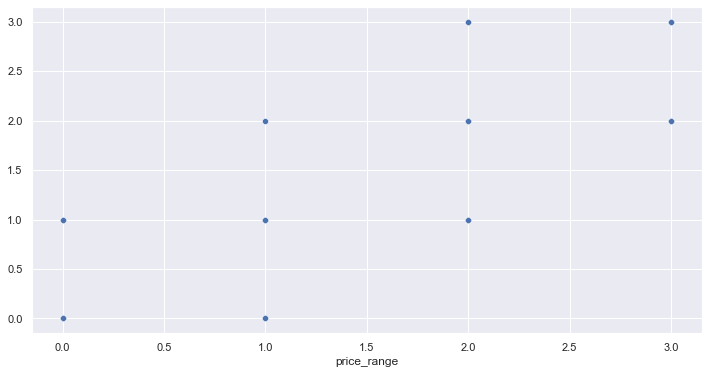

In [50]:
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(12,6)})
# sns.(y_test, y_pred)
sns.scatterplot(y_test, y_pred)
plt.show()